In [1]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
api_key = open('quandlapikey.txt', 'r').read()

In [2]:
df = quandl.get("FMAC/HPI_AK")
df.head()

,NSA Value,SA Value
Date,,
1975-01-31,34.456361,34.655493
1975-02-28,34.954360,35.123805
1975-03-31,35.465174,35.513620
1975-04-30,35.998432,35.890060
1975-05-31,36.581805,36.298572


In [3]:
fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
print(fiddy_states)

[    Name &postal abbreviation[1]                                 \
    Name &postal abbreviation[1] Name &postal abbreviation[1].1   
0                        Alabama                             AL   
1                         Alaska                             AK   
2                        Arizona                             AZ   
3                       Arkansas                             AR   
4                     California                             CA   
5                       Colorado                             CO   
6                    Connecticut                             CT   
7                       Delaware                             DE   
8                        Florida                             FL   
9                        Georgia                             GA   
10                        Hawaii                             HI   
11                         Idaho                             ID   
12                      Illinois                             

In [4]:
fiddy_states = fiddy_states[0]
fiddy_states.head()

Name &postal abbreviation[1]                                      Cities  \
  Name &postal abbreviation[1] Name &postal abbreviation[1].1      Capital   
0                      Alabama                             AL   Montgomery   
1                       Alaska                             AK       Juneau   
2                      Arizona                             AZ      Phoenix   
3                     Arkansas                             AR  Little Rock   
4                   California                             CA   Sacramento   

                 Established Population[upper-alpha 1][2] Total area[3]  \
    Largest[4]   Established Population[upper-alpha 1][2]           mi2   
0   Birmingham  Dec 14, 1819                      4874747         52420   
1    Anchorage   Jan 3, 1959                       739795        665384   
2      Phoenix  Feb 14, 1912                      7016270        113990   
3  Little Rock  Jun 15, 1836                      3004279         53179   
4  Los Angeles   Sep 9, 1850                     39536653        163695   

           Land area[3]          Water area[3]         Numberof Reps.  
       km2          mi2      km2           mi2     km2 Numberof Reps.  
0   135767        50645   131171          1775    4597              7  
1  1723337       570641  1477953         94743  245384              1  
2   295234       113594   294207           396    1026              9  
3   137732        52035   134771          1143    2961              4  
4   423967       155779   403466          7916   20501             53

In [5]:
fiddy_states = fiddy_states['Name &postal abbreviation[1]']['Name &postal abbreviation[1].1']
print(fiddy_states)

0     AL
1     AK
2     AZ
3     AR
4     CA
5     CO
6     CT
7     DE
8     FL
9     GA
10    HI
11    ID
12    IL
13    IN
14    IA
15    KS
16    KY
17    LA
18    ME
19    MD
20    MA
21    MI
22    MN
23    MS
24    MO
25    MT
26    NE
27    NV
28    NH
29    NJ
30    NM
31    NY
32    NC
33    ND
34    OH
35    OK
36    OR
37    PA
38    RI
39    SC
40    SD
41    TN
42    TX
43    UT
44    VT
45    VA
46    WA
47    WV
48    WI
49    WY
Name: Name &postal abbreviation[1].1, dtype: object


In [7]:
for abbv in fiddy_states:
    print("FMAC/HPI_"+str(abbv))

FMAC/HPI_AL
FMAC/HPI_AK
FMAC/HPI_AZ
FMAC/HPI_AR
FMAC/HPI_CA
FMAC/HPI_CO
FMAC/HPI_CT
FMAC/HPI_DE
FMAC/HPI_FL
FMAC/HPI_GA
FMAC/HPI_HI
FMAC/HPI_ID
FMAC/HPI_IL
FMAC/HPI_IN
FMAC/HPI_IA
FMAC/HPI_KS
FMAC/HPI_KY
FMAC/HPI_LA
FMAC/HPI_ME
FMAC/HPI_MD
FMAC/HPI_MA
FMAC/HPI_MI
FMAC/HPI_MN
FMAC/HPI_MS
FMAC/HPI_MO
FMAC/HPI_MT
FMAC/HPI_NE
FMAC/HPI_NV
FMAC/HPI_NH
FMAC/HPI_NJ
FMAC/HPI_NM
FMAC/HPI_NY
FMAC/HPI_NC
FMAC/HPI_ND
FMAC/HPI_OH
FMAC/HPI_OK
FMAC/HPI_OR
FMAC/HPI_PA
FMAC/HPI_RI
FMAC/HPI_SC
FMAC/HPI_SD
FMAC/HPI_TN
FMAC/HPI_TX
FMAC/HPI_UT
FMAC/HPI_VT
FMAC/HPI_VA
FMAC/HPI_WA
FMAC/HPI_WV
FMAC/HPI_WI
FMAC/HPI_WY


In [8]:
api_key = open('quandlapikey.txt','r').read()


main_df = pd.DataFrame()

for abbv in fiddy_states:
    query = "FMAC/HPI_"+str(abbv)
    df = quandl.get(query, authtoken=api_key)
    df = df.pct_change() # change to % info and look graph1  
    
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, lsuffix=abbv)
        
print(main_df.head())

            NSA ValueAK  SA ValueAK  NSA ValueAZ  SA ValueAZ  NSA ValueAR  \
Date                                                                        
1975-01-31          NaN         NaN          NaN         NaN          NaN   
1975-02-28     0.005458    0.005701     0.014453    0.013513     0.017292   
1975-03-31     0.006356    0.004928     0.014614    0.011098     0.015946   
1975-04-30     0.007666    0.005978     0.015036    0.010600     0.012033   
1975-05-31     0.006664    0.004983     0.016206    0.011382     0.005824   

            SA ValueAR  NSA ValueCA  SA ValueCA  NSA ValueCO  SA ValueCO  ...  \
Date                                                                      ...   
1975-01-31         NaN          NaN         NaN          NaN         NaN  ...   
1975-02-28    0.018198     0.007875    0.007903     0.003680    0.004382  ...   
1975-03-31    0.015664     0.006517    0.006492     0.012384    0.009931  ...   
1975-04-30    0.010786     0.005131    0.005496     0.0

In [9]:
# Save new dataframe with pickle %pct
pickle_out = open('fiddy_states_pct.pickle', 'wb')
pickle.dump(main_df, pickle_out)
pickle_out.close()

In [10]:
pickle_in = open('fiddy_states_pct.pickle', 'rb')
HPI_data = pickle.load(pickle_in)
print(HPI_data)

            NSA ValueAK  SA ValueAK  NSA ValueAZ  SA ValueAZ  NSA ValueAR  \
Date                                                                        
1975-01-31          NaN         NaN          NaN         NaN          NaN   
1975-02-28     0.005458    0.005701     0.014453    0.013513     0.017292   
1975-03-31     0.006356    0.004928     0.014614    0.011098     0.015946   
1975-04-30     0.007666    0.005978     0.015036    0.010600     0.012033   
1975-05-31     0.006664    0.004983     0.016206    0.011382     0.005824   
1975-06-30     0.002370    0.001247     0.017138    0.011462    -0.002273   
1975-07-31    -0.003258   -0.003454     0.016965    0.012674    -0.010782   
1975-08-31    -0.007038   -0.007182     0.015398    0.015127    -0.016476   
1975-09-30    -0.007057   -0.006773     0.013280    0.017206    -0.016925   
1975-10-31    -0.002932   -0.002645     0.011757    0.018244    -0.008938   
1975-11-30     0.003328    0.004247     0.010253    0.017453     0.005337   

In [11]:
HPI_data['NSA ValueTX']

Date
1975-01-31         NaN
1975-02-28   -0.001109
1975-03-31    0.000543
1975-04-30    0.002576
1975-05-31    0.003904
1975-06-30    0.004588
1975-07-31    0.004858
1975-08-31    0.005355
1975-09-30    0.007211
1975-10-31    0.010631
1975-11-30    0.013473
1975-12-31    0.011295
1976-01-31    0.004228
1976-02-29   -0.002101
1976-03-31   -0.002930
1976-04-30    0.001463
1976-05-31    0.004281
1976-06-30    0.002386
1976-07-31    0.000521
1976-08-31    0.000816
1976-09-30    0.001595
1976-10-31    0.002133
1976-11-30    0.002492
1976-12-31    0.003560
1977-01-31    0.006381
1977-02-28    0.010168
1977-03-31    0.012846
1977-04-30    0.013375
1977-05-31    0.011992
1977-06-30    0.011252
                ...   
2016-07-31    0.006118
2016-08-31    0.007343
2016-09-30    0.004662
2016-10-31    0.000560
2016-11-30   -0.000240
2016-12-31   -0.000392
2017-01-31    0.002097
2017-02-28    0.008521
2017-03-31    0.011990
2017-04-30    0.011886
2017-05-31    0.011418
2017-06-30    0.009791
2017-0

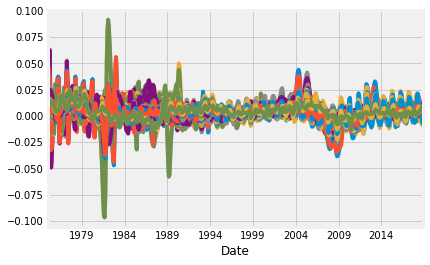

In [12]:
HPI_data.plot()
plt.legend().remove()

In [6]:


def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return fiddy_states

def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()
    
    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken=api_key)
    
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, lsuffix=abbv)

    print(main_df.head())
    
    pickle_out = open('fiddy_states.pickle', 'wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()
    
grab_initial_state_data()
    

ValueError: The column index must be expressed as an integer for FMAC/HPI_    Name &postal abbreviation[1]                                 \
    Name &postal abbreviation[1] Name &postal abbreviation[1].1   
0                        Alabama                             AL   
1                         Alaska                             AK   
2                        Arizona                             AZ   
3                       Arkansas                             AR   
4                     California                             CA   
5                       Colorado                             CO   
6                    Connecticut                             CT   
7                       Delaware                             DE   
8                        Florida                             FL   
9                        Georgia                             GA   
10                        Hawaii                             HI   
11                         Idaho                             ID   
12                      Illinois                             IL   
13                       Indiana                             IN   
14                          Iowa                             IA   
15                        Kansas                             KS   
16       Kentucky[upper-alpha 2]                             KY   
17                     Louisiana                             LA   
18                         Maine                             ME   
19                      Maryland                             MD   
20  Massachusetts[upper-alpha 2]                             MA   
21                      Michigan                             MI   
22                     Minnesota                             MN   
23                   Mississippi                             MS   
24                      Missouri                             MO   
25                       Montana                             MT   
26                      Nebraska                             NE   
27                        Nevada                             NV   
28                 New Hampshire                             NH   
29                    New Jersey                             NJ   
30                    New Mexico                             NM   
31                      New York                             NY   
32                North Carolina                             NC   
33                  North Dakota                             ND   
34                          Ohio                             OH   
35                      Oklahoma                             OK   
36                        Oregon                             OR   
37   Pennsylvania[upper-alpha 2]                             PA   
38   Rhode Island[upper-alpha 3]                             RI   
39                South Carolina                             SC   
40                  South Dakota                             SD   
41                     Tennessee                             TN   
42                         Texas                             TX   
43                          Utah                             UT   
44                       Vermont                             VT   
45       Virginia[upper-alpha 2]                             VA   
46                    Washington                             WA   
47                 West Virginia                             WV   
48                     Wisconsin                             WI   
49                       Wyoming                             WY   

            Cities                   Established Population[upper-alpha 1][2]  \
           Capital      Largest[4]   Established Population[upper-alpha 1][2]   
0       Montgomery      Birmingham  Dec 14, 1819                      4874747   
1           Juneau       Anchorage   Jan 3, 1959                       739795   
2          Phoenix         Phoenix  Feb 14, 1912                      7016270   
3      Little Rock     Little Rock  Jun 15, 1836                      3004279   
4       Sacramento     Los Angeles   Sep 9, 1850                     39536653   
5           Denver          Denver   Aug 1, 1876                      5607154   
6         Hartford      Bridgeport   Jan 9, 1788                      3588184   
7            Dover      Wilmington   Dec 7, 1787                       961939   
8      Tallahassee    Jacksonville   Mar 3, 1845                     20984400   
9          Atlanta         Atlanta   Jan 2, 1788                     10429379   
10        Honolulu        Honolulu  Aug 21, 1959                      1427538   
11           Boise           Boise   Jul 3, 1890                      1716943   
12     Springfield         Chicago   Dec 3, 1818                     12802023   
13    Indianapolis    Indianapolis  Dec 11, 1816                      6666818   
14      Des Moines      Des Moines  Dec 28, 1846                      3145711   
15          Topeka         Wichita  Jan 29, 1861                      2913123   
16       Frankfort      Louisville   Jun 1, 1792                      4454189   
17     Baton Rouge     New Orleans  Apr 30, 1812                      4684333   
18         Augusta        Portland  Mar 15, 1820                      1335907   
19       Annapolis       Baltimore  Apr 28, 1788                      6052177   
20          Boston          Boston   Feb 6, 1788                      6859819   
21         Lansing         Detroit  Jan 26, 1837                      9962311   
22        St. Paul     Minneapolis  May 11, 1858                      5576606   
23         Jackson         Jackson  Dec 10, 1817                      2984100   
24  Jefferson City     Kansas City  Aug 10, 1821                      6113532   
25          Helena        Billings   Nov 8, 1889                      1050493   
26         Lincoln           Omaha   Mar 1, 1867                      1920076   
27     Carson City       Las Vegas  Oct 31, 1864                      2998039   
28         Concord      Manchester  Jun 21, 1788                      1342795   
29         Trenton          Newark  Dec 18, 1787                      9005644   
30        Santa Fe     Albuquerque   Jan 6, 1912                      2088070   
31          Albany        New York  Jul 26, 1788                     19849399   
32         Raleigh       Charlotte  Nov 21, 1789                     10273419   
33        Bismarck           Fargo   Nov 2, 1889                       755393   
34        Columbus        Columbus   Mar 1, 1803                     11658609   
35   Oklahoma City   Oklahoma City  Nov 16, 1907                      3930864   
36           Salem        Portland  Feb 14, 1859                      4142776   
37      Harrisburg    Philadelphia  Dec 12, 1787                     12805537   
38      Providence      Providence  May 29, 1790                      1059639   
39        Columbia      Charleston  May 23, 1788                      5024369   
40          Pierre     Sioux Falls   Nov 2, 1889                       869666   
41       Nashville       Nashville   Jun 1, 1796                      6715984   
42          Austin         Houston  Dec 29, 1845                     28304596   
43  Salt Lake City  Salt Lake City   Jan 4, 1896                      3101833   
44      Montpelier      Burlington   Mar 4, 1791                       623657   
45        Richmond  Virginia Beach  Jun 25, 1788                      8470020   
46         Olympia         Seattle  Nov 11, 1889                      7405743   
47      Charleston      Charleston  Jun 20, 1863                      1815857   
48         Madison       Milwaukee  May 29, 1848                      5795483   
49        Cheyenne        Cheyenne  Jul 10, 1890                       579315   

   Total area[3]          Land area[3]          Water area[3]          \
             mi2      km2          mi2      km2           mi2     km2   
0          52420   135767        50645   131171          1775    4597   
1         665384  1723337       570641  1477953         94743  245384   
2         113990   295234       113594   294207           396    1026   
3          53179   137732        52035   134771          1143    2961   
4         163695   423967       155779   403466          7916   20501   
5         104094   269601       103642   268431           452    1170   
6           5543    14357         4842    12542           701    1816   
7           2489     6446         1949     5047           540    1399   
8          65758   170312        53625   138887         12133   31424   
9          59425   153910        57513   148959          1912    4951   
10         10932    28313         6423    16635          4509   11678   
11         83569   216443        82643   214045           926    2398   
12         57914   149995        55519   143793          2395    6202   
13         36420    94326        35826    92789           593    1537   
14         56273   145746        55857   144669           416    1077   
15         82278   213100        81759   211754           520    1346   
16         40408   104656        39486   102269           921    2387   
17         52378   135659        43204   111898          9174   23761   
18         35380    91633        30843    79883          4537   11750   
19         12406    32131         9707    25142          2699    6990   
20         10554    27336         7800    20202          2754    7134   
21         96714   250487        56539   146435         40175  104052   
22         86936   225163        79627   206232          7309   18930   
23         48432   125438        46923   121531          1508    3907   
24         69707   180540        68742   178040           965    2501   
25        147040   380831       145546   376962          1494    3869   
26         77348   200330        76824   198974           524    1356   
27        110572   286380       109781   284332           791    2048   
28          9349    24214         8953    23187           397    1027   
29          8723    22591         7354    19047          1368    3544   
30        121590   314917       121298   314161           292     757   
31         54555   141297        47126   122057          7429   19240   
32         53819   139391        48618   125920          5201   13471   
33         70698   183108        69001   178711          1698    4397   
34         44826   116098        40861   105829          3965   10269   
35         69899   181037        68595   177660          1304    3377   
36         98379   254799        95988   248608          2391    6191   
37         46054   119280        44743   115883          1312    3397   
38          1545     4001         1034     2678           511    1324   
39         32020    82933        30061    77857          1960    5076   
40         77116   199729        75811   196350          1305    3379   
41         42144   109153        41235   106798           909    2355   
42        268596   695662       261232   676587          7365   19075   
43         84897   219882        82170   212818          2727    7064   
44          9616    24906         9217    23871           400    1035   
45         42775   110787        39490   102279          3285    8508   
46         71298   184661        66456   172119          4842   12542   
47         24230    62756        24038    62259           192     497   
48         65496   169635        54158   140268         11339   29367   
49         97813   253335        97093   251470           720    1864   

   Numberof Reps.  
   Numberof Reps.  
0               7  
1               1  
2               9  
3               4  
4              53  
5               7  
6               5  
7               1  
8              27  
9              14  
10              2  
11              2  
12             18  
13              9  
14              4  
15              4  
16              6  
17              6  
18              2  
19              8  
20              9  
21             14  
22              8  
23              4  
24              8  
25              1  
26              3  
27              4  
28              2  
29             12  
30              3  
31             27  
32             13  
33              1  
34             16  
35              5  
36              5  
37             18  
38              2  
39              7  
40              1  
41              9  
42             36  
43              4  
44              1  
45             11  
46             10  
47              3  
48              8  
49              1  .